## https://archive.ics.uci.edu/ml/datasets/Airfoil+Self-Noise

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('airfoil_self_noise.dat', sep='\t', header=None)

In [3]:
# Define the columns
df.columns = ["Frequency", "Angle of attack","Chord length", "Free-stream velocity", "Suction side", "pressure level"]

In [4]:
df.head()

,Frequency,Angle of attack,Chord length,Free-stream velocity,Suction side,pressure level
0,800,0.0,0.3048,71.3,0.002663,126.201
1,1000,0.0,0.3048,71.3,0.002663,125.201
2,1250,0.0,0.3048,71.3,0.002663,125.951
3,1600,0.0,0.3048,71.3,0.002663,127.591
4,2000,0.0,0.3048,71.3,0.002663,127.461


In [5]:
# Check if there are null in data
df.isnull().sum()

Frequency               0
Angle of attack         0
Chord length            0
Free-stream velocity    0
Suction side            0
pressure level          0
dtype: int64

In [6]:
# Train test split
X = df.iloc[:,:-1]
y = df.iloc[:,-1]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [7]:
X_train.head()

,Frequency,Angle of attack,Chord length,Free-stream velocity,Suction side
845,500,11.2,0.0508,71.3,0.014072
1026,10000,4.8,0.0254,55.5,0.000873
621,2000,7.2,0.1524,39.6,0.009092
1371,630,6.7,0.1016,31.7,0.005929
195,6300,0.0,0.2286,71.3,0.002143


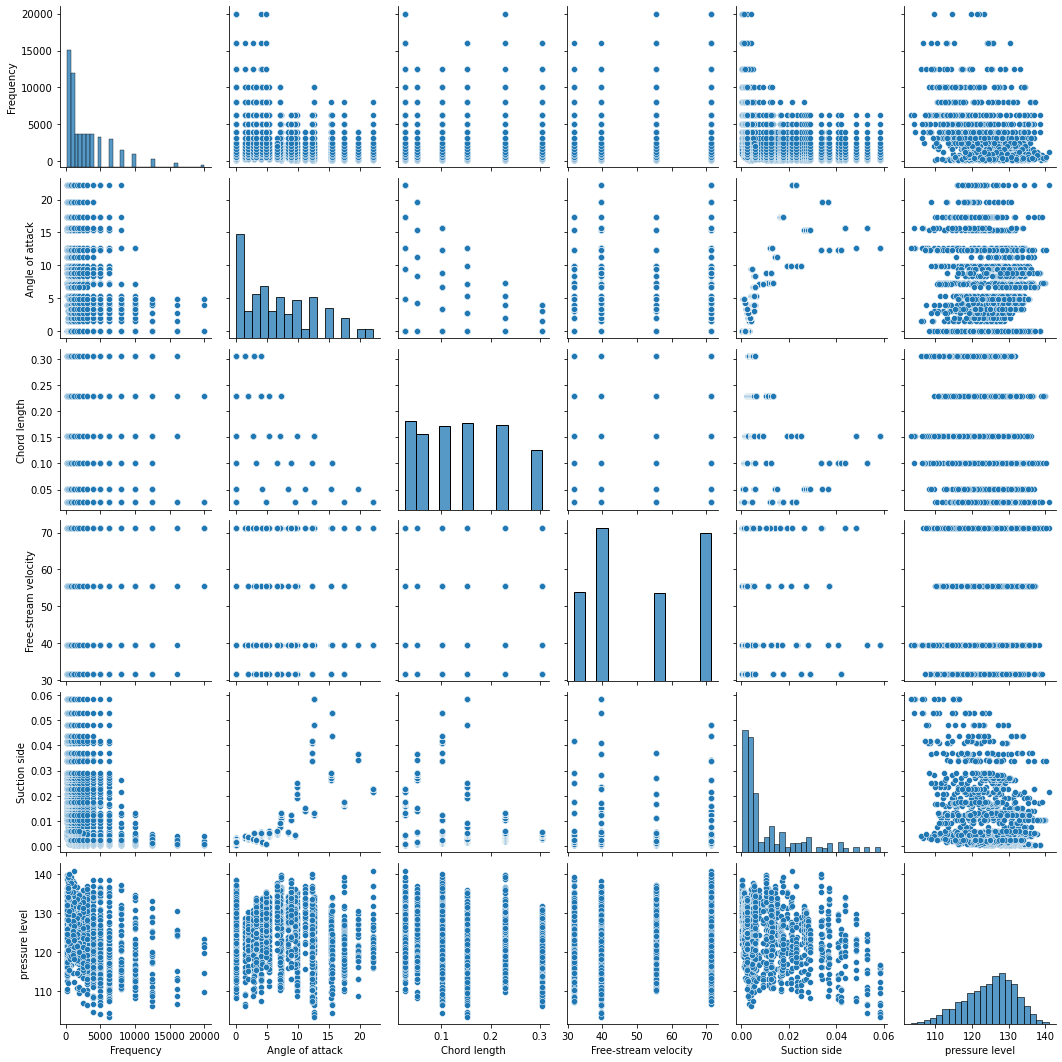

In [8]:
import seaborn as sns
sns.pairplot(df)

In [9]:
import matplotlib.pyplot as plt
df.corr()

,Frequency,Angle of attack,Chord length,Free-stream velocity,Suction side,pressure level
Frequency,1.000000,-0.272765,-0.003661,0.133664,-0.230107,-0.390711
Angle of attack,-0.272765,1.000000,-0.504868,0.058760,0.753394,-0.156108
Chord length,-0.003661,-0.504868,1.000000,0.003787,-0.220842,-0.236162
Free-stream velocity,0.133664,0.058760,0.003787,1.000000,-0.003974,0.125103
Suction side,-0.230107,0.753394,-0.220842,-0.003974,1.000000,-0.312670
pressure level,-0.390711,-0.156108,-0.236162,0.125103,-0.312670,1.000000


In [18]:
## Pandas profiling
# !pip install pandas_profiling
from pandas_profiling import ProfileReport
profile = ProfileReport(X_train, title="Pandas Profiling Report")
profile.to_widgets()
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

C:\Users\ashwin.prabhu\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


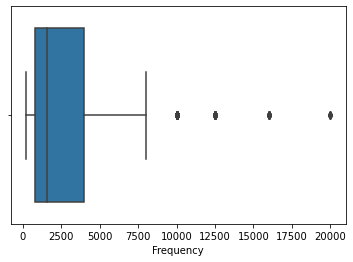

C:\Users\ashwin.prabhu\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


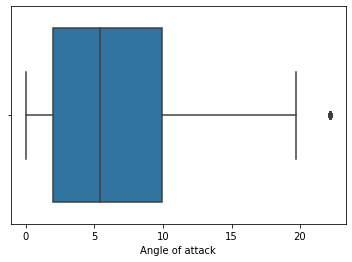

C:\Users\ashwin.prabhu\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


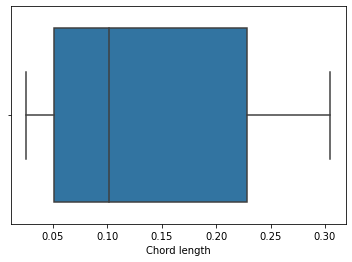

C:\Users\ashwin.prabhu\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


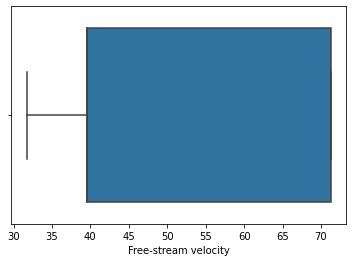

C:\Users\ashwin.prabhu\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


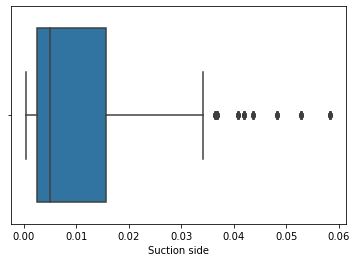

C:\Users\ashwin.prabhu\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


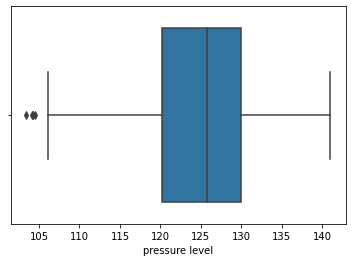

In [11]:
for i in df.columns:
    sns.boxplot(df[i])
    plt.show()

C:\Users\ashwin.prabhu\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Frequency', ylabel='pressure level'>

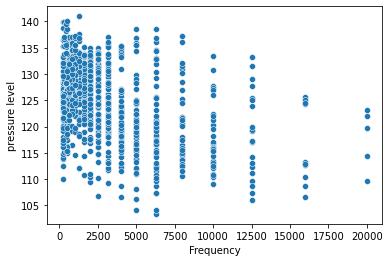

In [12]:
sns.scatterplot(X_train['Frequency'], y)

In [13]:
# Check if its a regression or classification. If the count is around 50 we can apply classification problem, else regression
df['pressure level'].unique()

array([126.201, 125.201, 125.951, ..., 106.604, 106.224, 104.204])

In [24]:
## Linear regression
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)
# Calculation of R2 Score
from sklearn.metrics import r2_score
r2_score(y_true, y_pred)

NameError: name 'y_true' is not defined

In [19]:
## Ridge Regression
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
ridge = Ridge()
paramenters={'alpha':[1e-15,1e-3,1e-2,1,5,10,20,30,40,50,55,100]}
ridge_regressor = GridSearchCV(ridge, paramenters, scoring='neg_mean_squared_error', cv=5,verbose=1)
ridge_regressor.fit(X_train, y_train)

print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
{'alpha': 0.001}
-23.602891271038246


In [20]:
## Lasso Regression
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
lasso=Lasso()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}
lasso_regressor=GridSearchCV(lasso,parameters,scoring='neg_mean_squared_error',cv=5)

lasso_regressor.fit(X_train, y_train)

print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)

C:\Users\ashwin.prabhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.199e+03, tolerance: 3.812e+00
  model = cd_fast.enet_coordinate_descent(
C:\Users\ashwin.prabhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.729e+03, tolerance: 3.843e+00
  model = cd_fast.enet_coordinate_descent(


{'alpha': 1e-08}
-23.604520590618996


In [21]:
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV
elasticnet=ElasticNet()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}
elasticnet_regressor=GridSearchCV(elasticnet,parameters,scoring='neg_mean_squared_error',cv=5)

elasticnet_regressor.fit(X_train, y_train) 
print(elasticnet_regressor.best_params_)
print(elasticnet_regressor.best_score_)

C:\Users\ashwin.prabhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.257e+03, tolerance: 3.812e+00
  model = cd_fast.enet_coordinate_descent(
C:\Users\ashwin.prabhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.770e+03, tolerance: 3.843e+00
  model = cd_fast.enet_coordinate_descent(
C:\Users\ashwin.prabhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality 

{'alpha': 1e-08}
-23.604511779726842


In [15]:
import pickle
pickle.dump(regressor, open('LinearRegression_Model.pkl', 'wb'))

In [22]:
!pip install flask

In [23]:
pickled_model = pickle.load(open('LinearRegression_Model.pkl', 'rb'))
pickled_model.predict(X_test)

array([124.06768512, 119.59316737, 120.29933092, 129.61912851,
       129.81089779, 132.61068301, 122.44438053, 126.7461602 ,
       129.99906397, 125.94601069, 132.50626617, 113.78942913,
       130.10151743, 132.51123677, 123.6412694 , 114.10666435,
       124.31679905, 126.6766228 , 129.24252599, 131.79580713,
       125.77675782, 125.02970619, 116.44955941, 129.88018679,
       124.2232864 , 124.67967727, 131.60657138, 124.57186337,
       115.76458243, 123.39652912, 125.13674229, 123.92018299,
       125.4841971 , 118.61796101, 121.70395495, 130.95730463,
       131.39243856, 128.29169206, 121.31077749, 117.99901537,
       126.41139865, 128.86175217, 126.44075781, 123.46463781,
       123.08590861, 130.13707376, 125.11244177, 120.01115538,
       123.19344296, 132.81698484, 128.72414835, 117.7903339 ,
       123.4283675 , 122.57110308, 126.71758509, 120.44811529,
       123.29741941, 128.68403927, 124.25898336, 123.22309466,
       125.44226349, 131.08621938, 126.73671008, 131.37